### Problem 2: Logistic Regression and LDA

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

Data Dictionary:

<b>Variable Name</b>:Description

<b>Holiday_Package</b>:Opted for Holiday Package yes/no?

<b>Salary</b>:Employee salary

<b>age</b>:Age in years

<b>edu</b>:Years of formal education

<b>no_young_children</b>:The number of young children (younger than 7 years)

<b>no_older_children</b>:Number of older children

<b>foreign</b>:Yes/No


2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

2.4 Inference: Basis on these predictions, what are the insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

In [617]:
# import os to set the path
import os
os.getcwd()

'C:\\Users\\612598\\OneDrive - Cognizant\\Desktop\\Great Learning\\Predictive Modelling Assignment'

In [618]:
os.chdir('C:\\Users\\612598\\OneDrive - Cognizant\\Desktop\\Great Learning\\Predictive Modelling Assignment')
os.getcwd()

'C:\\Users\\612598\\OneDrive - Cognizant\\Desktop\\Great Learning\\Predictive Modelling Assignment'

In [619]:
# import all necessary libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

#### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

Read the Dataset and store it into dataframe

In [620]:
# Read the Dataset and store it in dataframe
df=pd.read_csv('Holiday_Package.csv')

Head of the data : First 5 rows

In [621]:
#Print first 5 rows
df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


Last 5 rows

In [622]:
# print last 5 rows
df.tail()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes
871,872,no,74659,51,10,0,0,yes


Data Attributes:

In [623]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


Holliday_Package and foreign  variables are of object type, we will assign codes to it and then feed this data to Model.
Unnamed 0 is unwanted variable, which does not play any role here, Total we have 872 rows 8 columns in given dataset.
No Null Values in the Data

Description of Data:

In [624]:
df.describe()

,Unnamed: 0,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,436.500000,47729.172018,39.955275,9.307339,0.311927,0.982798
std,251.869014,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1.000000,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,218.750000,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,436.500000,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,654.250000,53469.500000,48.000000,12.000000,0.000000,2.000000
max,872.000000,236961.000000,62.000000,21.000000,3.000000,6.000000


Salary is continuous variable,Whereas age, educ and number young children are having integers.
Two Variables 'Holiday Package' and 'Employee went to Foreign or Not' are Categorical Variables.
Here Holiday Package is Target Variable/Independent variable. 

Lets drop the unwanted column : Unnamed: 0

In [625]:
df_data=df.drop('Unnamed: 0',axis=1)

Lets see the Head of Data After Removal of Unnamed column

In [626]:
df_data.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [627]:
# Null values check
df.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

No Null Values can be seen in the data.

lets Check whether duplicates are present in the Dataset or not.

In [628]:
# no. of duplicates
dups = df_data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df_data.shape)

Number of duplicate rows = 0
(872, 7)


No Duplicates seen in the Dataset

In [629]:
df_data.Holliday_Package.value_counts(normalize=True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

Output/Target Variable seems to be stable as we have almost same number of Records With Yes/No Output.54 % No and 46% Yes.

Lets Encode the Nominal Categorical Variables. Two Categorical variables: Holliday_Package and foreign

In [630]:
for feature in df_data.columns: 
    if df_data[feature].dtype == 'object': 
        print(feature)
        print(df_data[feature].value_counts())
        print('\n')
        

Holliday_Package
no     471
yes    401
Name: Holliday_Package, dtype: int64


foreign
no     656
yes    216
Name: foreign, dtype: int64




Lets plot the boxplot to get the idea of outliers. We Can see only Salary variable has outliers, which is also continuous variable.Other Variables are either Categorical or Integer, which has valid values.

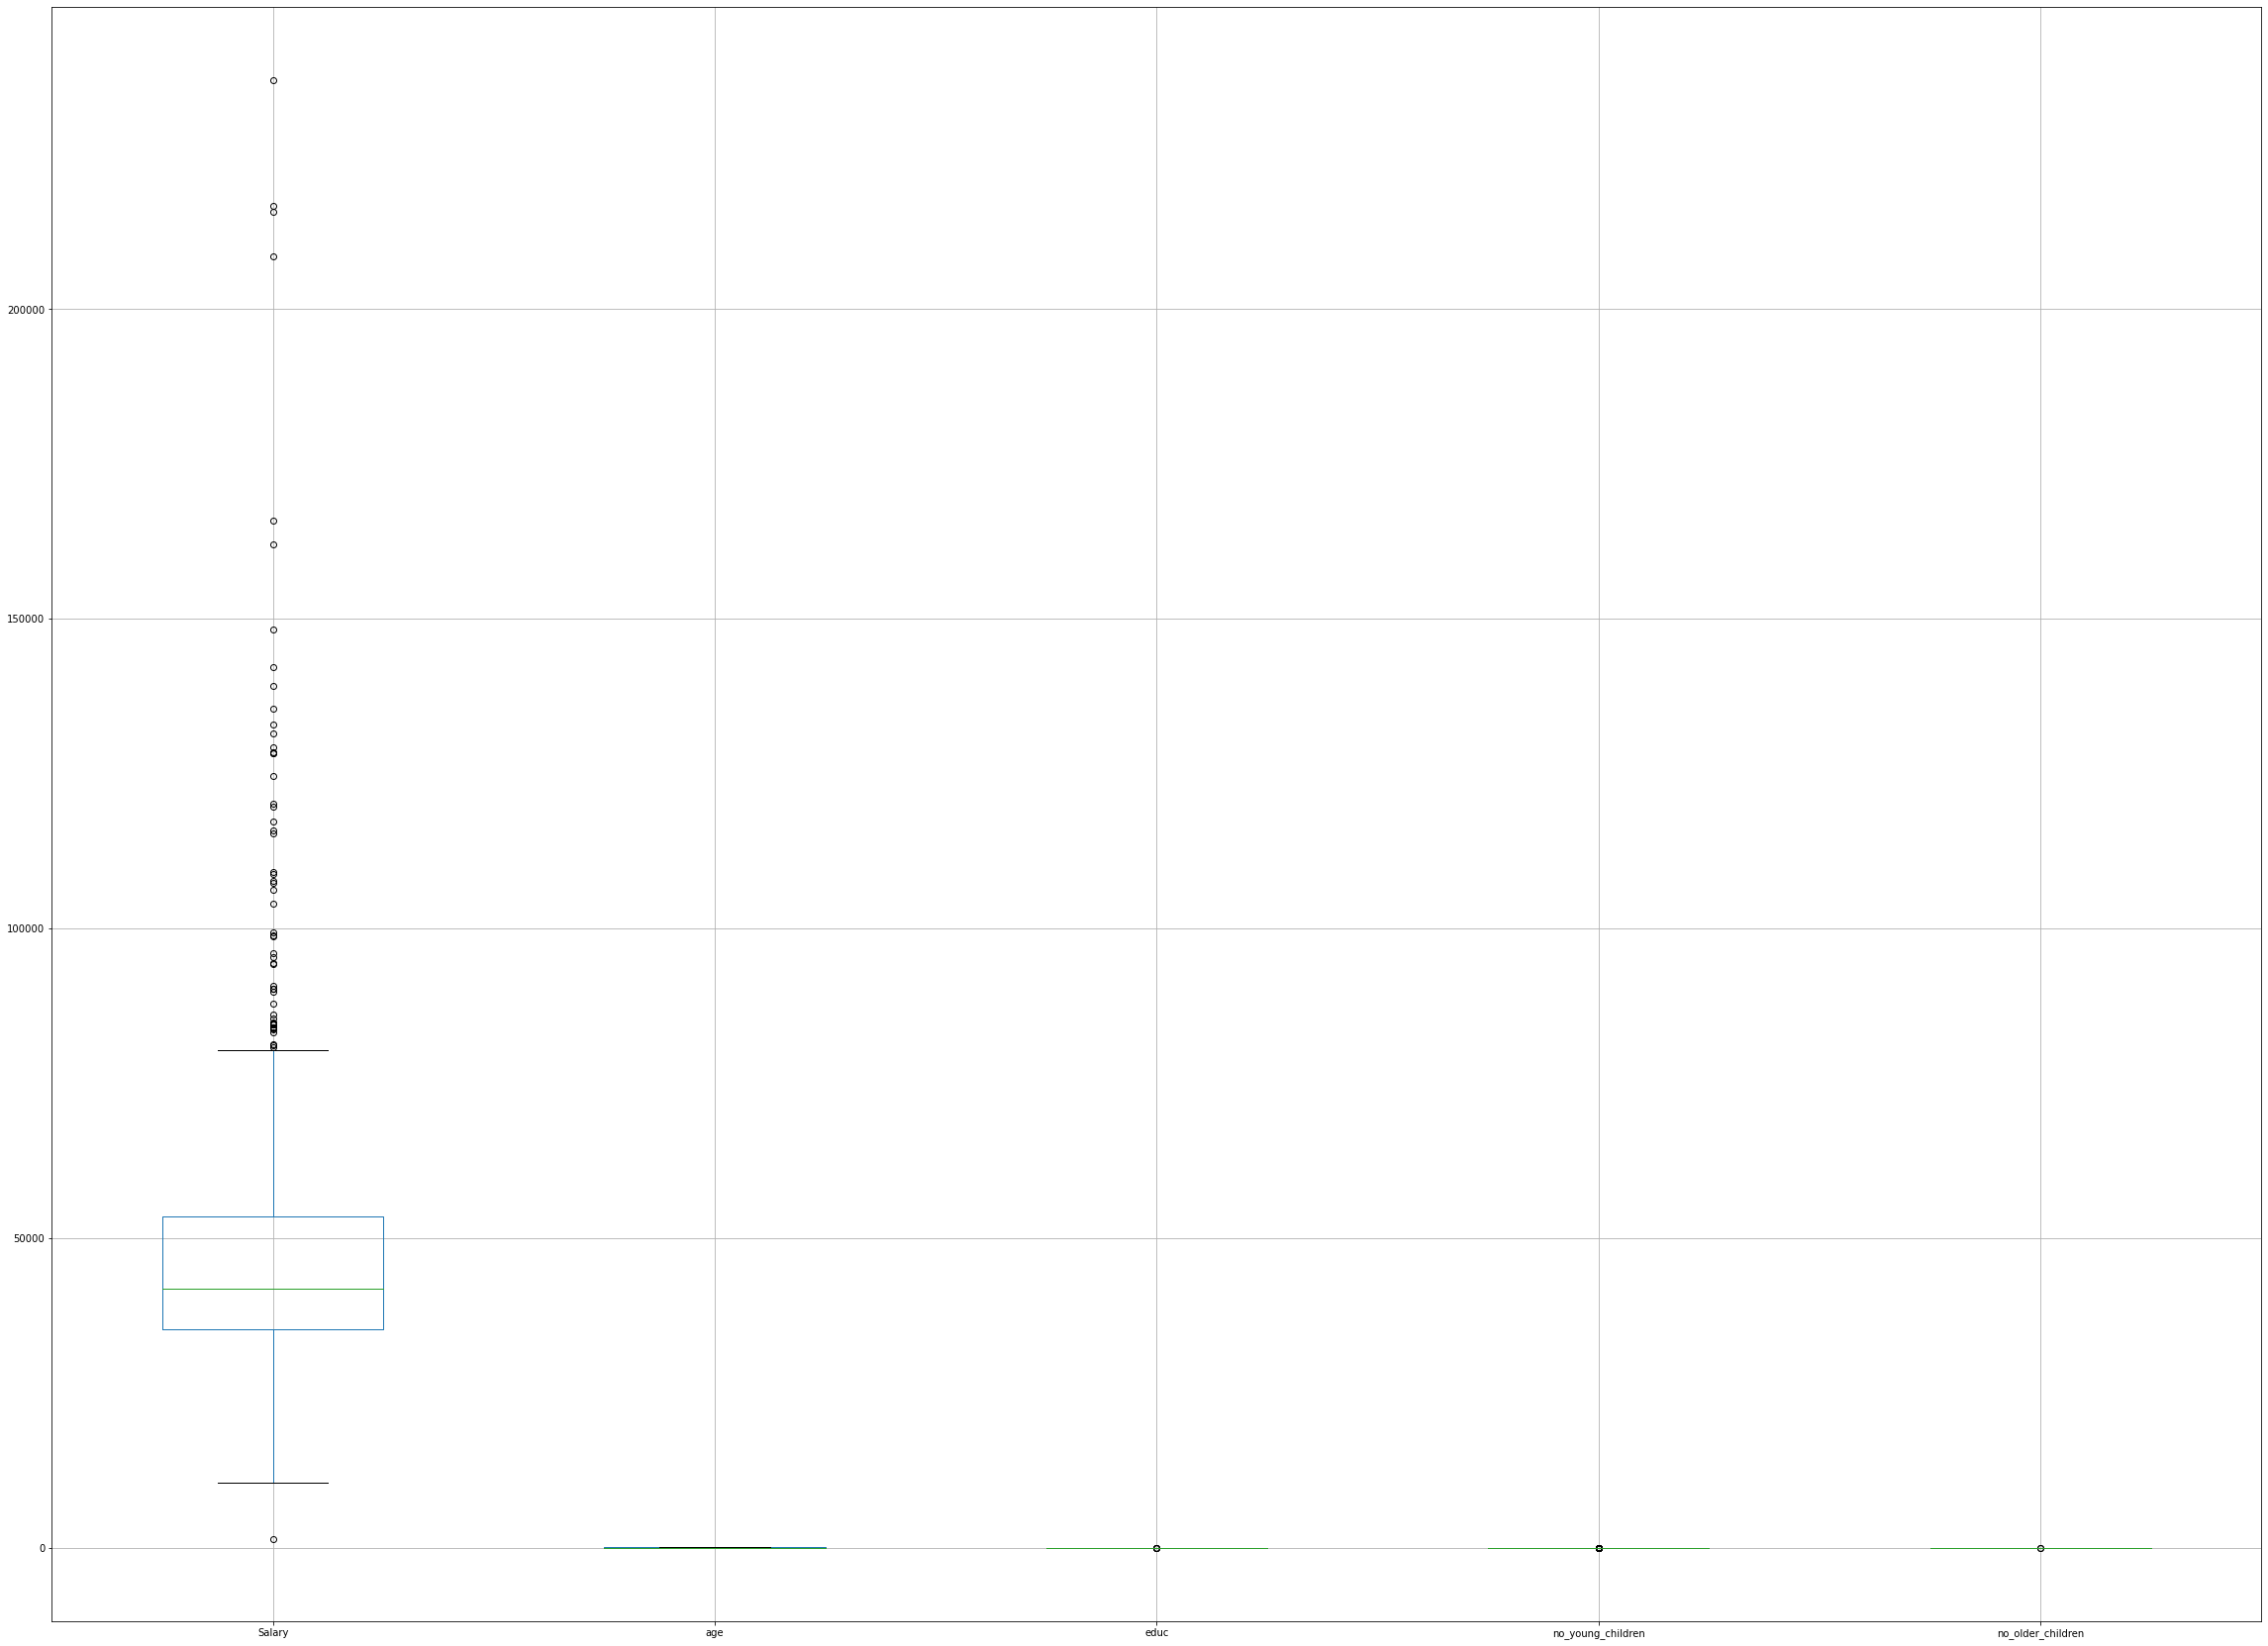

In [631]:
# Boxplot to get the Idea of Outliers
plt.figure(figsize=(40,30))
df_data.boxplot()

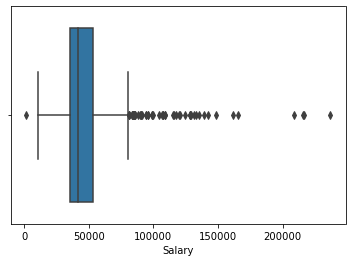

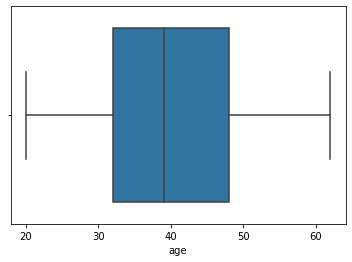

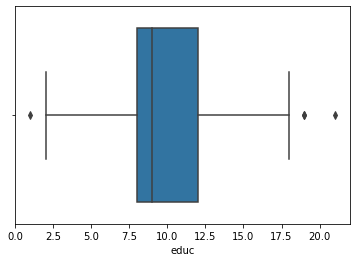

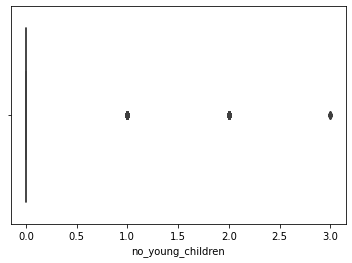

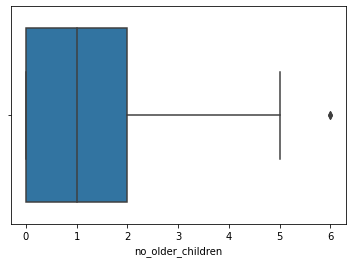

In [632]:
cols = ['Salary', 'age', 'educ', 'no_young_children','no_older_children']
for i in cols:
    sns.boxplot(df_data[i])
    plt.show();

'Salary'-> It has Outliers, We will remove it ahead. 
'age'->No Outliers in this varibale. 
'educ'-> It seems this variable has 3 Outiers, which seems valid. 
'no_young_children','no_older_children' have valid Outliers. so we will keep it as it is.


In [633]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

We will treat outliers only for Salary variable here

In [634]:
lr,ur=remove_outlier(df_data['Salary'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df_data['Salary']=np.where(df_data['Salary']>ur,ur,df_data['Salary'])
df_data['Salary']=np.where(df_data['Salary']<lr,lr,df_data['Salary'])

Lower Range : 8105.75 
Upper Range : 80687.75


Removal of Outliers Salary Variable can be seen like this.

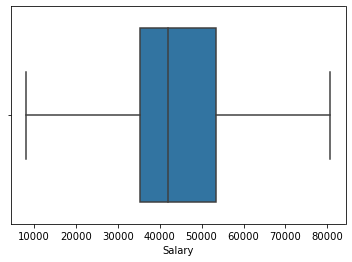

In [635]:
sns.boxplot(df_data['Salary'])

Lets plot the Heatmap, to get the idea of correlation.

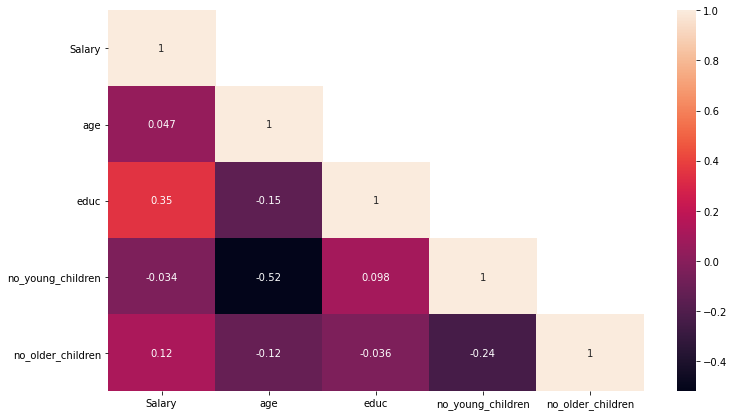

In [636]:
plt.figure(figsize=(12,7))
sns.heatmap(df_data.corr(), annot=True,mask=np.triu(df_data.corr(),+1));

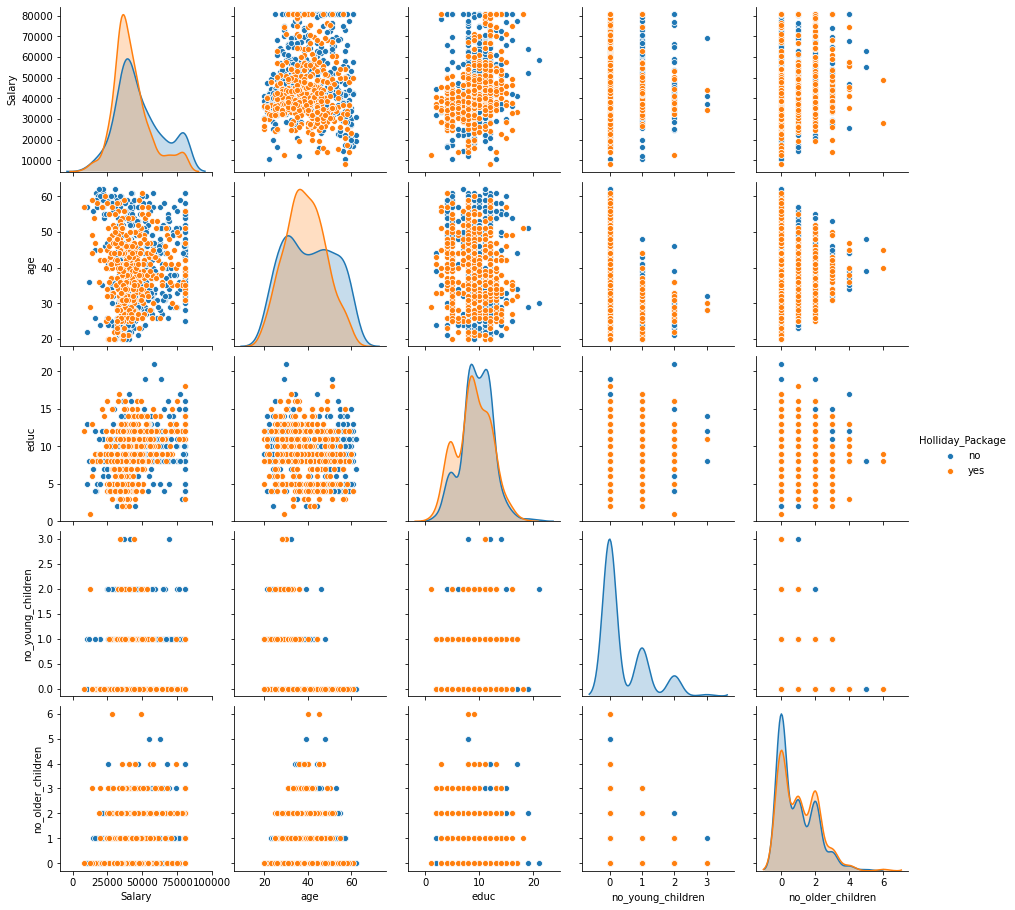

In [637]:
# Pairplot using sns
sns.pairplot(df_data ,diag_kind='kde' ,hue='Holliday_Package');

We can see that there is no issue of Multicollinearity,No dependent Variables show Strong Correlation amongst them.Education And Salary has some Relation between them.Lets do some Univariate and Multivariate Analysis and try to get some hidden patterns.

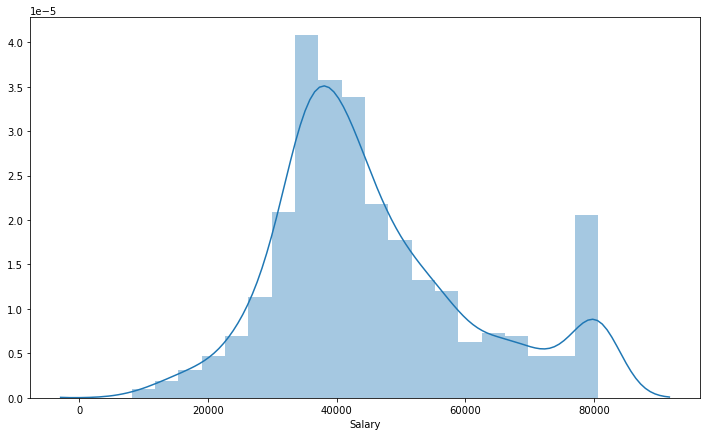

In [638]:
plt.figure(figsize=(12,7))
sns.distplot(df_data['Salary'])

The data is normally distributed almost equally around mean value, so we can say it is similar to Normal Distribution.

Lets do Bivariate Analysis: 

1.Salary vs Holiday_Package,

2.Salary vs Education ,

3.Salary vs Age,

4.No of Younge Children vs Holiday Package,

5.No of Older Children vs Holiday Package

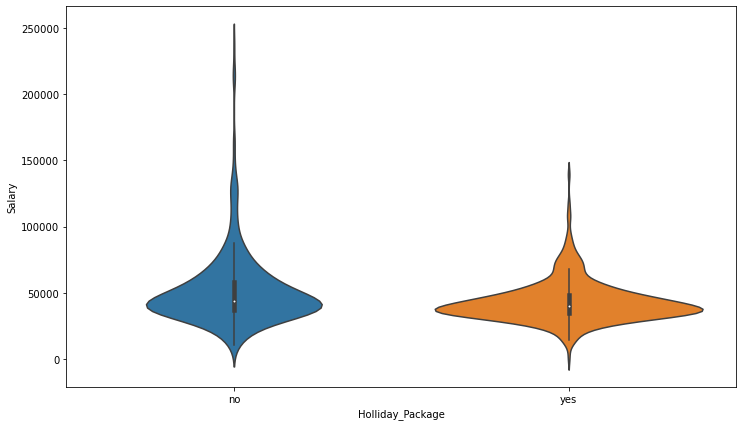

In [639]:
plt.figure(figsize=(12,7))
sns.violinplot(df['Holliday_Package'],df['Salary'])

Salary above 1,50,000 have always not opted for Holiday Package

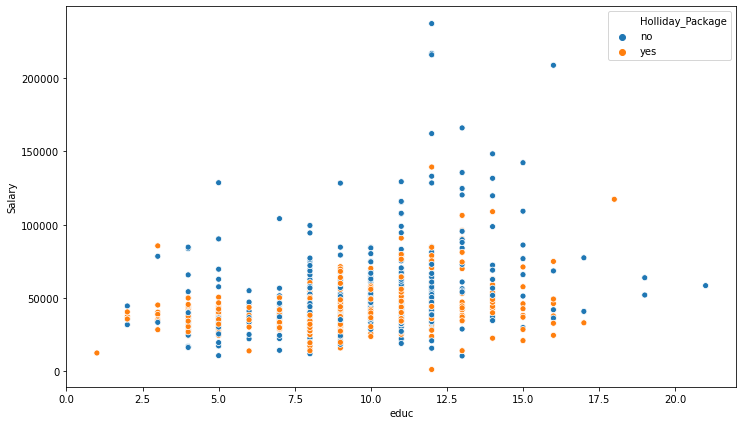

In [640]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='educ',y='Salary',hue='Holliday_Package',data=df)

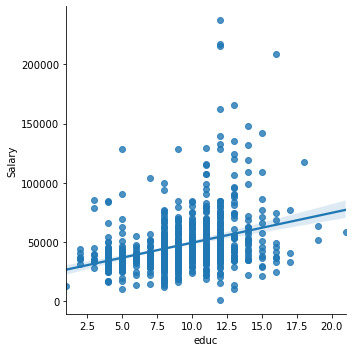

In [641]:
sns.lmplot(x='educ',y='Salary',data=df)

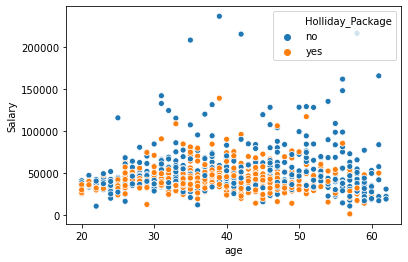

In [642]:
sns.scatterplot(x='age',y='Salary',hue='Holliday_Package',data=df)

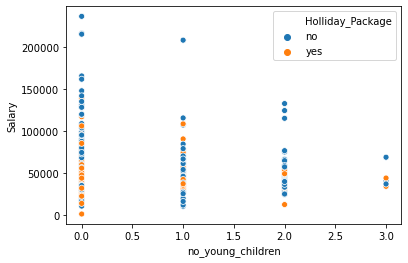

In [643]:
sns.scatterplot(x='no_young_children',y='Salary',hue='Holliday_Package',data=df)

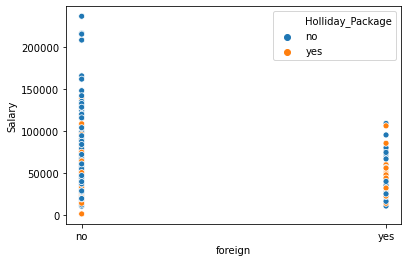

In [652]:
sns.scatterplot(x='foreign',y='Salary',hue='Holliday_Package',data=df)

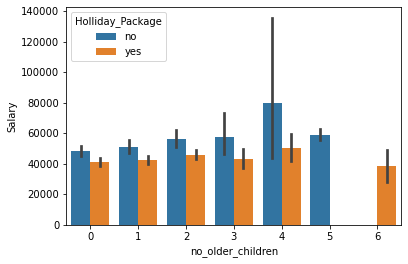

In [645]:
sns.barplot(x='no_older_children',y='Salary',hue='Holliday_Package',data=df)

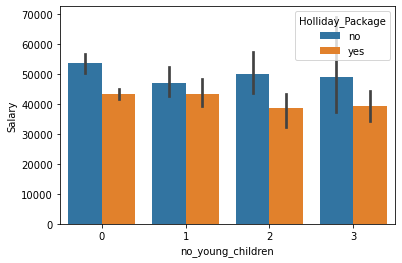

In [646]:
sns.barplot(x='no_young_children',y='Salary',hue='Holliday_Package',data=df)

Most of The Employees get the Salary between 10,000 to 1,00,000. and they are the ones who choosing Holiday_Packages.
It can be seen that Salary is High if No of Education years is High.

Very few Datapoints can suggest that Salary is Increasing with Age. Age group 20-60 Shows Almost Similar pattern in terms of Salary.Employee age over 50 to 60 have seems to be not taking the holiday package.

#### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [647]:
# Converting all objects to categorical codes
for feature in df_data.columns: 
    if df_data[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df_data[feature].unique()))
        print(pd.Categorical(df_data[feature].unique()).codes)
        df_data[feature] = pd.Categorical(df_data[feature]).codes



feature: Holliday_Package
[no, yes]
Categories (2, object): [no, yes]
[0 1]


feature: foreign
[no, yes]
Categories (2, object): [no, yes]
[0 1]


In [648]:
df_data.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.0,30,8,1,1,0
1,1,37207.0,45,8,0,1,0
2,0,58022.0,46,9,0,0,0
3,0,66503.0,31,11,2,0,0
4,0,66734.0,44,12,0,2,0


In [653]:
## Cleaning the coulmn names
df_data.columns = df_data.columns.str.replace('Holliday_Package', 'Holiday_Package')
df_data.columns = df_data.columns.str.replace('age', 'age')
df_data.columns = df_data.columns.str.replace('educ', 'Education')
df_data.columns = df_data.columns.str.replace('foreign', 'Foreigner')

In [654]:
df_data.head()

,Holiday_Package,Salary,age,Education,no_young_children,no_older_children,Foreigner
0,0,48412.0,30,8,1,1,0
1,1,37207.0,45,8,0,1,0
2,0,58022.0,46,9,0,0,0
3,0,66503.0,31,11,2,0,0
4,0,66734.0,44,12,0,2,0


In [655]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holiday_Package    872 non-null    int8   
 1   Salary             872 non-null    float64
 2   age                872 non-null    int64  
 3   Education          872 non-null    int64  
 4   no_young_children  872 non-null    int64  
 5   no_older_children  872 non-null    int64  
 6   Foreigner          872 non-null    int8   
dtypes: float64(1), int64(4), int8(2)
memory usage: 35.9 KB


In [656]:
# Variance Inflation Factor (VIF): Checking for Multicollinearity
df_data.columns

Index(['Holiday_Package', 'Salary', 'age', 'Education', 'no_young_children',
       'no_older_children', 'Foreigner'],
      dtype='object')

In [657]:
Z= df_data[['Salary','age', 'Education', 'no_young_children', 'no_older_children', 'Foreigner']]

In [658]:
Z

,Salary,age,Education,no_young_children,no_older_children,Foreigner
0,48412.0,30,8,1,1,0
1,37207.0,45,8,0,1,0
2,58022.0,46,9,0,0,0
3,66503.0,31,11,2,0,0
4,66734.0,44,12,0,2,0
...,...,...,...,...,...,...
867,40030.0,24,4,2,1,1
868,32137.0,48,8,0,0,1
869,25178.0,24,6,2,0,1
870,55958.0,41,10,0,1,1


VIF Calculation:

In [659]:
import statsmodels.formula.api as sm

In [660]:
def vif_cal(Z):
    x_var =Z
    xvar_names = Z.columns
    vif = pd.DataFrame()
    for i in range(0, xvar_names.shape[0]):
        y=x_var[xvar_names[i]]
        x = x_var[xvar_names.drop(xvar_names[i])]
        rsq =sm.ols(formula ="y~x", data =x_var).fit().rsquared
        vif = round(1/(1-rsq),2)
        print(xvar_names[i], 'VIF = ' , vif)

In [661]:
vif_cal(Z= df_data[['Salary','age', 'Education', 'no_young_children', 'no_older_children', 'Foreigner']])

Salary VIF =  1.2
age VIF =  1.56
Education VIF =  1.41
no_young_children VIF =  1.57
no_older_children VIF =  1.19
Foreigner VIF =  1.27


VIF is less than 4, Hence all Dependent Variables dont show much multicollinearity.

Train and Test Split

In [662]:
# Train Test Split
# Copy all the predictor variables into X dataframe
X = df_data.drop('Holiday_Package', axis=1)

# Copy target into the y dataframe. 
y = df_data['Holiday_Package']

In [663]:
# Split X and y into training and test set in 70:30 ratio
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [664]:
y_train_lr.value_counts(1)

0    0.539344
1    0.460656
Name: Holiday_Package, dtype: float64

In [665]:
y_test_lr.value_counts(1)

0    0.541985
1    0.458015
Name: Holiday_Package, dtype: float64

##### Apply Logistic Regression

In [666]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train_lr, y_train_lr)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   32.5s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [667]:
# Predicting on Training and Test dataset
ytrain_predict_lr = model.predict(X_train_lr)
ytest_predict_lr = model.predict(X_test_lr)

In [668]:
# Getting the Predicted Classes and Probs
ytest_predict_prob_lr=model.predict_proba(X_test_lr)
pd.DataFrame(ytest_predict_prob_lr).head()

,0,1
0,0.677845,0.322155
1,0.534493,0.465507
2,0.691845,0.308155
3,0.487745,0.512255
4,0.571939,0.428061


#### Apply Linear Discriminant Analysis

In [669]:
# Note: The Below Lines are Commented as dont Run both Algorithms Simulteneously, First Run Logistic Regression and See its Metrics 
# Then Run LDA and find its Performance Metrics

In [670]:
# Split X and y into training and test set in 70:30 ratio
# X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [671]:
# y_train_lda.value_counts(1)

In [672]:
# y_test_lda.value_counts(1)

In [673]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train_lda,y_train_lda)

##### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

#### Performance Metrics Logistic Regression:

In [674]:
# Accuracy - Training Data
lr_train_acc=model.score(X_train_lr, y_train_lr)

AUC: 0.714


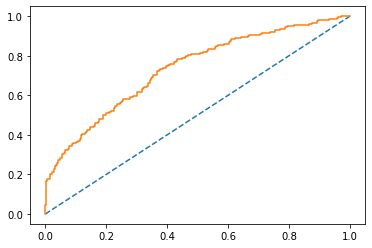

In [675]:
# AUC and ROC for the training data
# predict probabilities
probs = model.predict_proba(X_train_lr)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train_lr, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_lr, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [676]:
# Accuracy - Test Data
lr_test_acc=model.score(X_test_lr, y_test_lr)

AUC: 0.715


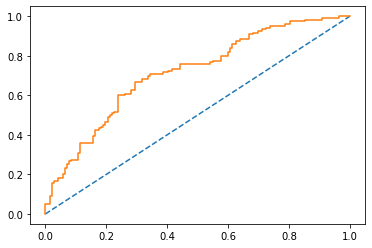

In [677]:
# AUC and ROC for the test data
# predict probabilities
probs = model.predict_proba(X_test_lr)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test_lr, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test_lr, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [678]:
# Confusion Matrix for the training data

In [679]:
confusion_matrix(y_train_lr, ytrain_predict_lr)

array([[244,  85],
       [118, 163]], dtype=int64)

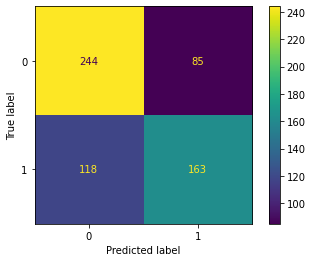

In [680]:
plot_confusion_matrix(model,X_train_lr,y_train_lr);

In [681]:
print(classification_report(y_train_lr, ytrain_predict_lr))

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610



In [682]:
# Logistic Regression Metrics Training Data
lr_metrics_train=classification_report(y_train_lr, ytrain_predict_lr,output_dict=True)
df=pd.DataFrame(lr_metrics_train).transpose()
lr_train_f1=round(df.loc["1"][2],2)
lr_train_recall=round(df.loc["1"][1],2)
lr_train_precision=round(df.loc["1"][0],2)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_precision  0.66
lr_train_recall  0.58
lr_train_f1  0.62


In [683]:
# Confusion Matrix for test data
confusion_matrix(y_test_lr, ytest_predict_lr)

array([[108,  34],
       [ 58,  62]], dtype=int64)

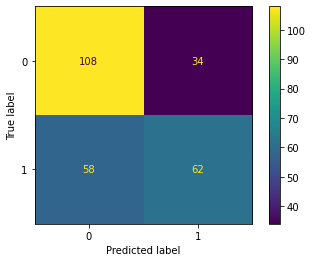

In [684]:
plot_confusion_matrix(model,X_test_lr,y_test_lr);

In [685]:
# Test Data Classification report for Logistic Regression
print(classification_report(y_test_lr, ytest_predict_lr))

              precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262



In [686]:
# Logistic Regression Test data Metrics
lr_metrics_test=classification_report(y_test_lr, ytest_predict_lr,output_dict=True)
df=pd.DataFrame(lr_metrics_test).transpose()
lr_test_precision=round(df.loc["1"][0],2)
lr_test_recall=round(df.loc["1"][1],2)
lr_test_f1=round(df.loc["1"][2],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_precision  0.65
lr_test_recall  0.52
lr_test_f1  0.57


In [687]:
# Applying GridSearchCV for Logistic Regression
grid={'penalty':['l2','none'],
      'solver':['newton-cg','lbfgs','liblinear'],
      'tol':[0.0001,0.00001]}

In [688]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [689]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')
## Scoring - Strategy to evaluate the performance of the cross-validated model on the test set.

In [690]:
grid_search.fit(X_train_lr, y_train_lr)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [691]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg')


In [692]:
best_model = grid_search.best_estimator_

In [693]:
# Prediction on the training set

ytrain_predict_lr = best_model.predict(X_train_lr)
ytest_predict_lr = best_model.predict(X_test_lr)

In [694]:
## Getting the probabilities on the test set

ytest_predict_prob_lr=best_model.predict_proba(X_test_lr)
pd.DataFrame(ytest_predict_prob_lr).head()

,0,1
0,0.677845,0.322155
1,0.534493,0.465507
2,0.691845,0.308155
3,0.487745,0.512255
4,0.571939,0.428061


              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610
 



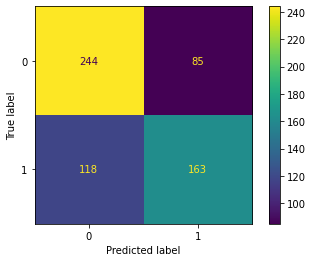

In [695]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train_lr,y_train_lr)
print(classification_report(y_train_lr, ytrain_predict_lr),'\n');

              precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262
 



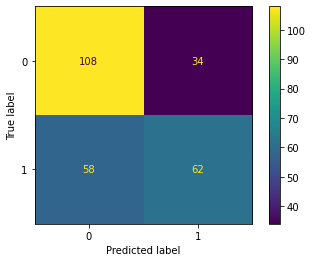

In [696]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test_lr,y_test_lr)
print(classification_report(y_test_lr, ytest_predict_lr),'\n');

In [697]:
# Getting the equation

In [698]:
df_data.columns

Index(['Holiday_Package', 'Salary', 'age', 'Education', 'no_young_children',
       'no_older_children', 'Foreigner'],
      dtype='object')

In [699]:
A1 = 'Holiday_Package~Salary+age+Education+no_young_children+no_older_children+Foreigner'

In [700]:
model_1 = sm.logit(formula =A1, data =df_data).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.604108
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Holiday_Package   No. Observations:                  872
Model:                          Logit   Df Residuals:                      865
Method:                           MLE   Df Model:                            6
Date:                Sun, 11 Apr 2021   Pseudo R-squ.:                  0.1244
Time:                        21:06:51   Log-Likelihood:                -526.78
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 9.138e-30
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.5432      0.559      4.550      0.000       1.448       3.639
Salary            -2.088e-05   5.26e-06     -3.970      0.000   -3.12e-05   -1.06e-05
age                  -0.0496      0.009     -5.491      0.000      -0.067      -0.032
Education             0.0342      0.029      1.172      0.241      -0.023       0.091
no_young_children    -1.3287      0.180     -7.386      0.000      -1.681      -0.976
no_older_children    -0.0251      0.074     -0.341      0.733      -0.169       0.119
Foreigner             1.3037      0.200      6.519      0.000       0.912       1.696
=====================================================================================
"""

#### Performance Metrics Linear Discriminant Analysis

In [701]:
# Split X and y into training and test set in 70:30 ratio
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [702]:
y_train_lda.value_counts(1)

0    0.539344
1    0.460656
Name: Holiday_Package, dtype: float64

In [703]:
y_test_lda.value_counts(1)

0    0.541985
1    0.458015
Name: Holiday_Package, dtype: float64

In [704]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train_lda,y_train_lda)

In [705]:
# Prediction
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train_lda)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test_lda)

In [706]:
# Training Data and Test Data Confusion Matrix Comparison

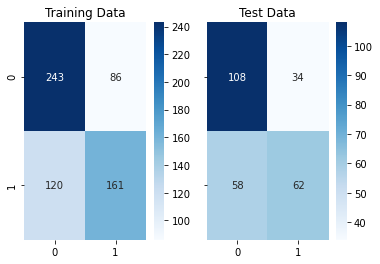

In [707]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_lda,pred_class_train)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test_lda,pred_class_test)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][1]);
a[0][1].set_title('Test Data');


### Training Data and Test Data Classification Report Comparison

In [708]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train_lda,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test_lda,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.57      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262
 



### Probability prediction for the training and test data

In [709]:
# Training Data Probability Prediction
pred_prob_train_lda = model.predict_proba(X_train_lda)

# Test Data Probability Prediction
pred_prob_test_lda = model.predict_proba(X_test_lda)

In [710]:
pred_prob_train_lda[:,1]

array([0.73381047, 0.28335139, 0.39602227, 0.75811139, 0.47077503,
       0.40288832, 0.36938597, 0.30429271, 0.60511549, 0.64331779,
       0.23236876, 0.25905352, 0.35870658, 0.04481746, 0.28052157,
       0.36436459, 0.54805152, 0.30607846, 0.58596151, 0.66087477,
       0.62864901, 0.26524013, 0.88183311, 0.3339946 , 0.08650304,
       0.82610447, 0.19401889, 0.75721542, 0.53138081, 0.1884556 ,
       0.29545808, 0.33809258, 0.3786442 , 0.3805076 , 0.31248766,
       0.29335095, 0.10970912, 0.56057784, 0.48145587, 0.19510252,
       0.22664102, 0.79936112, 0.5017598 , 0.73936151, 0.7906696 ,
       0.36957611, 0.30401273, 0.93317999, 0.43207603, 0.72243241,
       0.71571829, 0.45361505, 0.78697249, 0.3732299 , 0.19256563,
       0.74061067, 0.25056989, 0.51469343, 0.67344556, 0.35368416,
       0.61007438, 0.52767641, 0.52194835, 0.41031873, 0.56904209,
       0.61659997, 0.1237378 , 0.56414678, 0.40272604, 0.27648254,
       0.33165029, 0.74716143, 0.77838017, 0.21902504, 0.44569

AUC for the Training Data: 0.731
AUC for the Test Data: 0.714


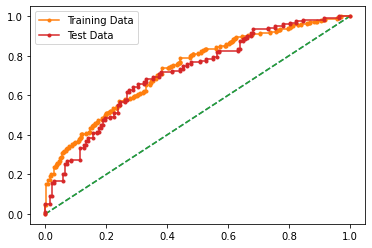

In [711]:
# AUC and ROC for the training data

# calculate AUC
lda_train_auc = metrics.roc_auc_score(y_train_lda,pred_prob_train_lda[:,1])
print('AUC for the Training Data: %.3f' %lda_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_lda,pred_prob_train_lda[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
lda_test_auc = metrics.roc_auc_score(y_test_lda,pred_prob_test_lda[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test_lda,pred_prob_test_lda[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

0.1 

Accuracy Score 0.4738
F1 Score 0.6356 

Confusion Matrix


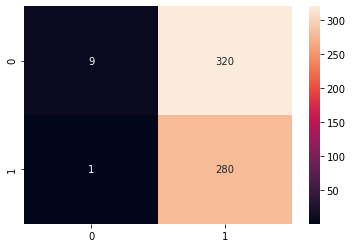

0.2 

Accuracy Score 0.523
F1 Score 0.6498 

Confusion Matrix


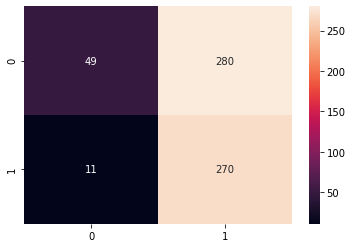

0.3 

Accuracy Score 0.6066
F1 Score 0.6774 

Confusion Matrix


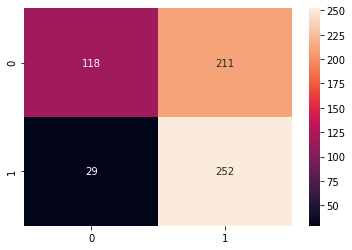

0.4 

Accuracy Score 0.6623
F1 Score 0.6677 

Confusion Matrix


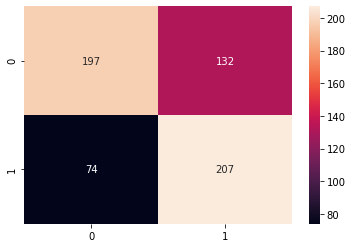

0.5 

Accuracy Score 0.6623
F1 Score 0.6098 

Confusion Matrix


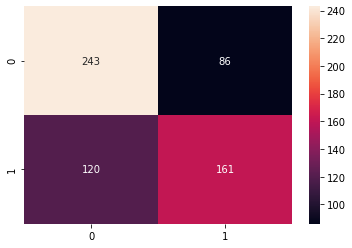

0.6 

Accuracy Score 0.6508
F1 Score 0.5192 

Confusion Matrix


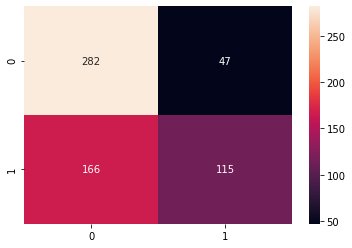

0.7 

Accuracy Score 0.6426
F1 Score 0.4263 

Confusion Matrix


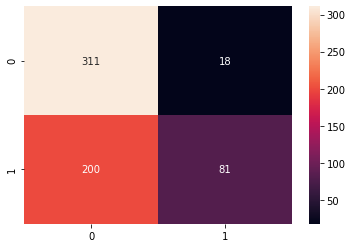

0.8 

Accuracy Score 0.5902
F1 Score 0.2038 

Confusion Matrix


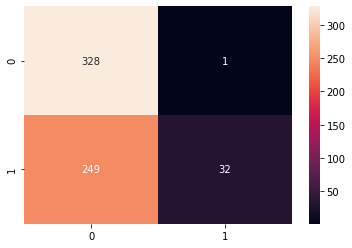

0.9 

Accuracy Score 0.5426
F1 Score 0.0141 

Confusion Matrix


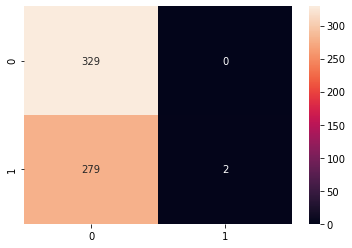

In [712]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train_lda)):#defining a loop for the length of the test data
        if np.array(pred_prob_train_lda[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train_lda,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train_lda,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train_lda,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [713]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_train=[]#defining an empty list
    for i in range(0,len(y_train_lda)):#defining a loop for the length of the test data
        if np.array(pred_prob_train_lda[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_train.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
        
    print('Cutoff:', round (j,3),'\t', 'Accuracy:',round(metrics.accuracy_score(y_train_lda,custom_cutoff_train),4),
                                            'recall:',round(metrics.recall_score(y_train_lda,custom_cutoff_train),4),
                                             'precision:',round(metrics.precision_score(y_train_lda,custom_cutoff_train),4),
                                             'F1 Score:',round(metrics.f1_score(y_train_lda,custom_cutoff_train),4)
                )

Cutoff: 0.1 	 Accuracy: 0.4738 recall: 0.9964 precision: 0.4667 F1 Score: 0.6356
Cutoff: 0.2 	 Accuracy: 0.523 recall: 0.9609 precision: 0.4909 F1 Score: 0.6498
Cutoff: 0.3 	 Accuracy: 0.6066 recall: 0.8968 precision: 0.5443 F1 Score: 0.6774
Cutoff: 0.4 	 Accuracy: 0.6623 recall: 0.7367 precision: 0.6106 F1 Score: 0.6677
Cutoff: 0.5 	 Accuracy: 0.6623 recall: 0.573 precision: 0.6518 F1 Score: 0.6098
Cutoff: 0.6 	 Accuracy: 0.6508 recall: 0.4093 precision: 0.7099 F1 Score: 0.5192
Cutoff: 0.7 	 Accuracy: 0.6426 recall: 0.2883 precision: 0.8182 F1 Score: 0.4263
Cutoff: 0.8 	 Accuracy: 0.5902 recall: 0.1139 precision: 0.9697 F1 Score: 0.2038
Cutoff: 0.9 	 Accuracy: 0.5426 recall: 0.0071 precision: 1.0 F1 Score: 0.0141


In [714]:
# Cutoff: 0.3 	 Accuracy: 0.6066 recall: 0.8968 precision: 0.5443 F1 Score: 0.6774
lda_train_recall=0.8968
lda_train_precision=0.5443
lda_train_f1=0.6774

In [715]:
#Predicting the classes on the test data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test_lda[:,1])):
    if np.array(pred_prob_test_lda[:,1])[i]>0.3:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

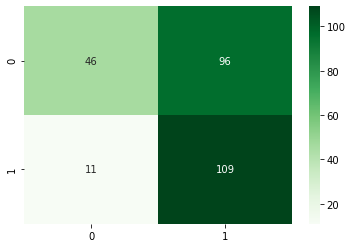

In [716]:
sns.heatmap((metrics.confusion_matrix(y_test_lda,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Greens');

In [717]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(y_test_lda,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(y_test_lda,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.81      0.32      0.46       142
           1       0.53      0.91      0.67       120

    accuracy                           0.59       262
   macro avg       0.67      0.62      0.57       262
weighted avg       0.68      0.59      0.56       262
 



In [718]:
lda_metrics_test=classification_report(y_test_lda, data_pred_custom_cutoff,output_dict=True)
df=pd.DataFrame(lda_metrics_test).transpose()
lda_test_precision=round(df.loc["1"][0],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_f1=round(df.loc["1"][2],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.53
lda_test_recall  0.91
lda_test_f1  0.67


In [719]:
# Accuracy - Test Data
lda_test_acc=model.score(X_test_lda, y_test_lda)
lda_test_acc

0.648854961832061

In [720]:
# Accuracy - Train Data
lda_train_acc=model.score(X_train_lda, y_train_lda)
lda_train_acc

0.6622950819672131

In [721]:
data = pd.DataFrame({'LR Train':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
'LR Test':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1]},index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score'])
round(data,2)

,LR Train,LR Test,LDA Train,LDA Test
Accuracy,0.67,0.65,0.66,0.65
AUC,0.73,0.71,0.73,0.71
Recall,0.58,0.52,0.90,0.91
Precision,0.66,0.65,0.54,0.53
F1 Score,0.62,0.57,0.68,0.67


If we Compare the above results, Accuracy and AUC are almost same for both models. In case of Recall and Precision both Models have performed good and better vice versa, so this can be little nullified.
Now F1 score remains a strong deciding Factor, but we can see that both are having almost similar value. but LDA seens to be on brighter side in comparision with Logistic Regression.Generally Linear Discriminant Analysis Performs better if Target variable is Categorical.

#### 2.4 Inference: Basis on these predictions, what are the insights and recommendations. Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present. 

##### Summary:
In this Case study we have to decide strategy or plan by looking at 872 employees data. We have to provide a plan to improve the count of Holiday Packages and earn more profit.

##### Steps Performed and Insights:
To Achive this first we did Exploratory Data Analysis, to get the hidden patterns within variables.and we found some Interesting insights in this step.

Salary is continuous variable,Whereas age, educ and number young children are having integers. Two Variables 'Holiday Package' and 'Employee went to Foreign or Not' are Categorical Variables. Here Holiday Package is Target Variable/Independent variable.

'Salary' is independent variable and it has Outliers, We have removed it.Other variables has outliers but we have not removed it, as it seems valid.

Most of The Employees get the Salary between 10,000 to 1,00,000. and they are the ones who choosing Holiday_Packages. It can be seen that Salary is High if No of Education years is High.

Very few Datapoints can suggest that Salary is Increasing with Age. Age group 20-60 Shows Almost Similar pattern in terms of Salary.Employee age over 50 to 60 have seems to be not taking the holiday package.

After EDA, We have split the data and Applied two algorithms
1.Logistic Regression
2.Linear Discriminant Analyis

Both Algorithms shown almost similar Results after performing metric checks.

Salary, Education and age seems to be deciding factors.
here it can be seen that person who went to Foreign opted for Holiday Package.

##### Recommendations:

The one who are Earning above 1,50,000 are not choosing Packages, we need further data to find why.
or on present data we can say that by providing some better tour plans, foreign trips ,If they are busy with their work we can provide Some uninterrupted Connection/Internet/Connectivity plans, so that we can convince them to select package.

The Person who are above 50 needs to be Targeted,as they are not choosing Holiday Packages. We might need to change the plans, Or promotional offers, Couple discounts, Some additional Security. Or we can convince this age group by giving  a company of more people from same age group, so that they will not feel alone or missed.

We have to Provide the better plans to the ones who has Older children and more convinient trips to the once who has children in range of 0-7 years, to increase Sales.


